# Visualização de Dados

Quando precisamos expôr resultados de forma objetiva e clara, devemos recorrer a recursos visuais. Uma boa visualização de dados se utiliza destes rercursos para chamar à atenção e a compreensão do público diante a análise que foi executada. Tabelas, gráficos, diagramas, etc, são exemplos de visulização. Desta forma, veremos que o Python nos oferece uma gama de opções para desenvolver tais recursos.

![banner.png](banner.png)

# Matplotlib

O `matplotlib` é a principal biblioteca de visualização de dados no Python. Trata-se de uma biblioteca muito completa, sendo ideal para gerar qualquer tipo de gráfico. No entanto, as opções de personalização dos gráficos podem ser massantes e complexas quando utilizamos apenas o `matplotlib` para gerar nossas visualizações, e por isso ferramentas como o `seaborn` facilitam a execução desta tarefa.

# Seaborn

A biblioteca `seaborn` simplifica e abstrai algumas configurações de temas que seriam mais complexas do `matplotlib`, gerando gráficos mais atrativos com códigos mais limpos e mais simples. Neste notebook, apenas nos prenderemos a utilizar ao Seaborn por sua praticidade.

# Importação

In [1]:
import matplotlib.pyplot as plt  # É a principal ferramenta capaz de gerar gráficos no python.
import seaborn as sns            # Baseado no matplotlib o seaborn é uma biblioteca que facilita a criacao de gráficos no 
                                 # matplotlib.
import numpy as np               # Estaremos importando o numpy apenas para executar alguns exemplos.
import pandas as pd              # Neste notebook apenas utilizaremos para a leitura de csv.

# Seaborn

## Gráfico de linha

O gráfico de linha é um tipo de gráfico que exibe informações com uma série de pontos de dados chamados de marcadores, ligados por segmentos de linha reta.

Faremos um gráfico da quantidade de divórcios conscedidos em primeira instância o longo dos anos de 2009 a 2017 no Brasil. Para isto, criaremos um gráfico de linha com o intuito de demonstrar a confecção de uma série temporal.

In [2]:
# Dados retirados do site SIDRA do IBGE.
anos = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
divorcios = [171747, 239070, 347583, 341600, 324921, 341181, 328960, 344526, 373216]

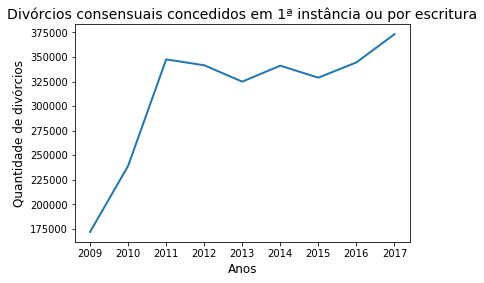

In [3]:
sns.lineplot(anos,
         divorcios, 
         linewidth=2)

# Configurando título e rótulos dos eixos.
plt.title('Divórcios consensuais concedidos em 1ª instância ou por escritura', fontsize=14)
plt.xlabel('Anos', fontsize=12)
plt.ylabel('Quantidade de divórcios', fontsize=12)

# Mudando a grossura dos eixos.
plt.tick_params(axis='both', labelsize=10)

plt.show() # Para 'desenhar' o gráfico

## Gráfico de barras

O gráfico de barras é uma ferramenta que possibilita a análise de dados observando o tamanho de barras verticais ou horizontais. Estas barras podem reprensentar frequências e valores de variáveis.

Iremos criar uma classe chamada de "Dado", essa classe imita um dado. Para ser iniciada, devemos passar Dado (Número de faces no dado). Possui um método chamado de "rolar_dado" que simula o lançamento do dado.

In [4]:
class Dado:
    """Classe representando um dado de X lados."""
    
    def __init__(self, n_lados=6):
        """Inicializa um dado com o número de dados igual a n_lados"""
        self.n_lados = n_lados
        
    def rolar_dado(self, n_lancamentos=1):
        """Lança o dado sorteado uma das faces"""
        return np.random.randint(1, self.n_lados + 1, n_lancamentos)

Aqui iremos simular o lançamento de 2 dados com 5 faces e soma-las e também o lançamento de 1 dado com 10 faces. Iremos fazer 10000 lançamentos e comparar a frequência de resultados obtidos.

In [5]:
d10 = Dado(10)                                  # Instanciando um dado de 10 lados.
d5 = Dado(5)                                    # Instanciando um dado de 5 lados.

resultados_d10 = list(d10.rolar_dado(10000))
    

resultados_2d5 =[d5.rolar_dado() + d5.rolar_dado() for lancamento in range(10000)]


# Aqui estamos preenchendo uma lista com a frequência de cada valor ocorridos nos dados.
frequencias_d10 = []
for valor in range(1, 11):
    frequencia = resultados_d10.count(valor)
    frequencias_d10.append(frequencia)

frequencias_2d5 = []
for valor in range(2, 11):
    frequencia = resultados_2d5.count(valor)
    frequencias_2d5.append(frequencia)
    
frequencias_2d5.insert(0,0)

Iremos utilizar o método `sns.barplot()` para dizer ao python para guardar um gráfico de barras em memória. Se utilizarmos o comando duas vezes seguidas para diferentes conjuntos de dados os gráficos ficarão sobrepostos. Após isso, podemos utilizar `plt.show()` para mostrar os gráficos ao final da linha.

**Gerando o gráfico**

Para o lançamento de 2 dados de 5 faces.

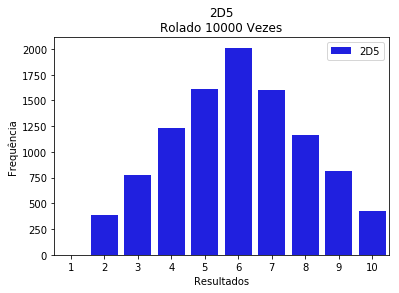

In [6]:
sns.barplot(x=list(range(1,11)),             # `y` recebe o conjunto de valores que correspondem ao eixo x.
            y=frequencias_2d5,               # `y` recebe o conjunto de valores que correspondem ao eixo y.
            color="blue",                    # `color` recebe uma string com o nome de uma cor para as barras.
            label='2D5')                     # `label` será o "nome" que este gráfico receberá, utilizaremos este "nome" para
                                             # gerar uma legenda para nosso gráfico.
plt.title('2D5\nRolado 10000 Vezes')         # Adiciona título ao gráfico
plt.ylabel('Frequência')                     # Adiciona um rótulo ao eixo y
plt.xlabel('Resultados')                     # Adiciona um rótulo ao eixo x
plt.legend()                                 # Adiciona legenda ao gráfico, ele utilizará os `labels` anteriores para construir
                                             # esta legenda.
plt.show()                                   

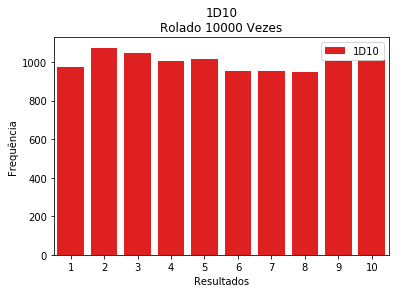

In [7]:
sns.barplot(x=list(range(1,11)),
            y=frequencias_d10, 
            color="red",
            label = '1D10')

plt.title('1D10\nRolado 10000 Vezes')        
plt.ylabel('Frequência')                     
plt.xlabel('Resultados')                     
plt.legend()                                 

plt.show()                                   

Para colocar os gráficos na mesma imagem, basta adicioná-los um após o outro. O mesmo serve para os diferentes tipos de gráfico.

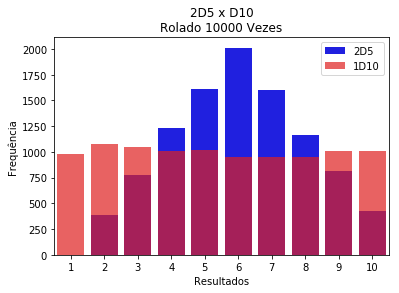

In [8]:
sns.barplot(x=list(range(1,11)),
            y=frequencias_2d5,              
            color="blue",                    
            label='2D5')                     

sns.barplot(x=list(range(1,11)),
            y=frequencias_d10, 
            color="red", 
            alpha=0.7,                      # Adiciona transparência as barras.
            label = '1D10')

plt.title('2D5 x D10\nRolado 10000 Vezes')  
plt.ylabel('Frequência')                     
plt.xlabel('Resultados')                   
plt.legend()                                 

plt.show()                                   

## Histogramas

Geraremos uma amostra aleatória de tamanho 100 de uma população normal padrão utilizando a biblioteca numpy, com o intuito de gerar dados para os gráficos.

$$X \sim N(0,1)$$

In [9]:
np.random.seed(29)                           # Configura uma "semente" para controlarmos as aleatorieade para os exemplos.
amostra_normal = np.random.normal(size=100)  # Gera uma amostra de tamanho 100 de uma distribuição normal com média 0 e
                                             # variância 1.
amostra_normal[:10]                          # Visualizar os 10 primeiros valores sorteados

array([-0.41748213,  0.7060321 ,  1.9159847 , -2.1417555 ,  0.71905689,
        0.46707262,  0.76672253,  0.88200945,  0.80875066, -0.94716485])

O método `sns.distplot` irá gerar um gráfico da nossa distribuição. O argumento `kde` recebe um booleano, em caso de `False` ele irá gerar um simples histograma de nossa distribuição pos omitirá a curva de densidade da distribuição da nossa amostra.

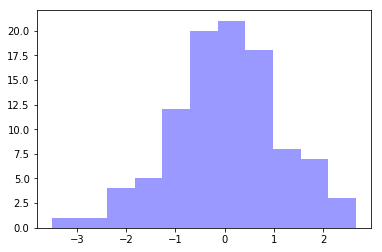

In [10]:
sns.distplot(amostra_normal,
             kde=False, 
             color="b")
plt.show() 

Similar ao código anterior, o próximo gráfico recebe o argumento `hist` com o valor `False` isso fará com que o histograma seja omitido e apenas a cruva de densidade distribuição da nossa amostra apareça.
O argumento `rug` também recebe um booleano, em caso de `True` adiciona *rug plot* ao nosso gráfico.
Rug plot ou gráfico de tapete mostra a distribuição dos dados de forma unidimensional.

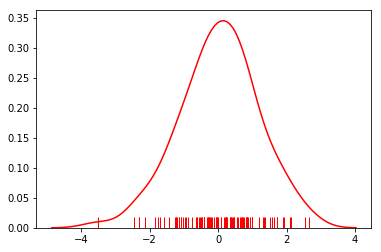

In [11]:
sns.distplot(amostra_normal, 
             hist=False, 
             rug=True, 
             color="r")
plt.show()

Se desejamos plotar nosso gráfico com o histograma e a curva da densidade, podemos utilizar o método `sns.distplot` apenas passando nossa amostra como argumento

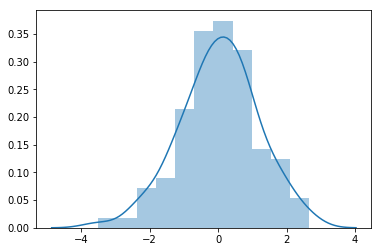

In [12]:
sns.distplot(amostra_normal)
plt.show()

Se quisermos colocar várias distribuições no mesmo conjunto de eixos.

In [13]:
gamma_0 = np.random.gamma(5, 3, 100) # Gerando a amostra
gamma_1 = np.random.gamma(3, 2, 100)

$$ X \sim Gamma(5, 3)$$
$$ Y \sim Gamma(3, 2)$$

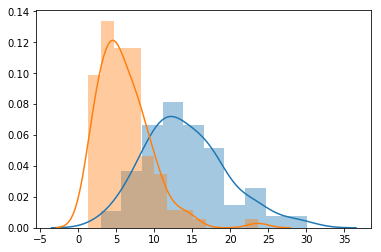

In [14]:
sns.distplot(gamma_0)
sns.distplot(gamma_1)
plt.show()

## Gráfico de setores

O gráfico de setores, também conhecido como gráfico de pizza, possui a mesma aplicação do gráfico de barras. Ele é geralmente utilizado para ilustrar quando  há alta diferença entre frequências das variáveis estudadas.  Quando não há essa diferença ou existem muitas divisões entre é preferível utilizar o gráfico de barras.

Para gerar um gráfico de setores devemos primeiro contruir uma lista com as contagens de cada elemento e a outra lista com os rótulos desejados para cada contagem.

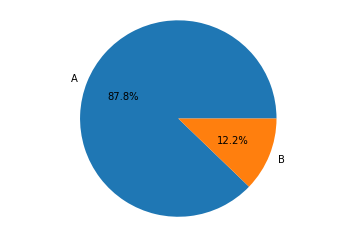

In [15]:
labels = ['A', 'B']           # Criando rótulos de dois grupos.
contagem = [87.8, 12.2]       # Lista com as proporções.

fig1, ax1 = plt.subplots()    # Criando uma área "plotável"
ax1.pie(contagem, 
        labels=labels,
        autopct='%1.1f%%')    # O argumento `autopct` mostra a formatação do texto com as proporções.

ax1.axis('equal')
plt.show()

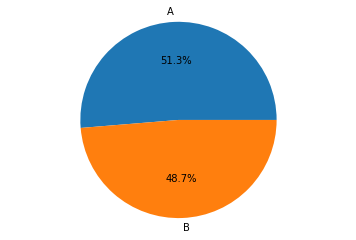

In [16]:
labels = ['A', 'B']              
contagem = [51.3, 48.7]          

fig1, ax1 = plt.subplots()       
ax1.pie(contagem, 
        labels=labels, 
        autopct='%1.1f%%')

ax1.axis('equal')
plt.show()

Agora utilizaremos um banco de dados localizado na pasta `datasets/` sobre o desempenho de alunos em testes de matemática e leitura e geraremos uma visualização para ele.

In [17]:
# Lendo o arquivo
data = pd.read_csv('datasets/StudentsPerformance.csv')
data.keys() # Verificando quais colunas nosso arquivo possui

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

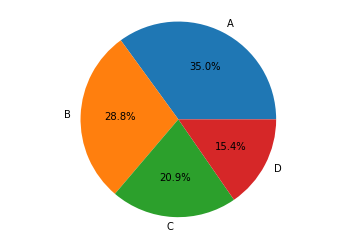

In [18]:
labels = ['A', 'B', 'C', 'D'] # Criando rótulos dos grupos étnicos
# Colocando a contagem de cada elmento de um a coluna em uma lista
contagem = [data['race/ethnicity'].value_counts()[0],
        data['race/ethnicity'].value_counts()[1],
        data['race/ethnicity'].value_counts()[2],
        data['race/ethnicity'].value_counts()[3]]

fig1, ax1 = plt.subplots() # Criando uma área "plotável"
ax1.pie(contagem, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

## Boxplot

Boxplot é uma ferramenta gráfica para representar a variação de dados observados de uma variável numérica por meio de quartis, amplitude dos dados e possíveis pontos discrepantes. Os chamados 'bigodes', linhas horizontais localizadas nas pontas das caixas representam o máximo e o mínimo dos valores observados não levando em consideração os outliers.
Outliers são valores discrepantes observados na nossa amostra.
A linha horizontal central  se trata da mediana, ou seja, até ela se encontram 50% dos dados observados. Ela é cercada por outras duas linhas o primeiro e terceiro quartis, que correspondem a 25% e 75% dos valores observados.

`sns.boxplot` é o metodo responsável por criar boxplots. Temos como argumentos  os valores de `x` e `y`. Além disso, podemos colocar o argumento `hue` que recebe uma string com o nome de uma coluna com dados categórico, com o intuito de separar nossa observação nesses grupos. `palette` seleciona a paleta de cores, neste caso magenta e verde.

#### Boxplot simples

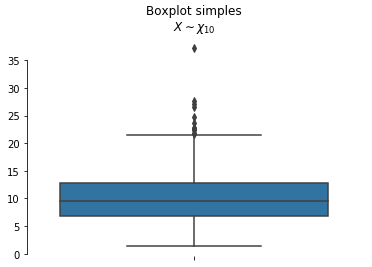

In [19]:
np.random.seed(1337)
amostra_qui_quadrado = np.random.chisquare(10, 1000)
sns.boxplot(y=amostra_qui_quadrado)
sns.despine(trim=True)                                 # `sns.despine` controla a estetética do gráfico o argumetno trim = True
                                                       # remove o contorno da caixa de gráfico

plt.title('Boxplot simples\n$X\sim\chi_{10}$')         # Veja que podemos utilizar Latex no título.
plt.show()

#### Boxplot complexos

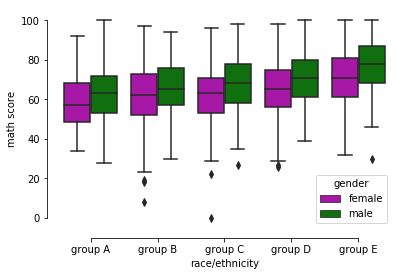

In [20]:
sns.boxplot(x="race/ethnicity",                                              # Eixo X receberá os grupos.
            y="math score",                                                  # Eixo Y receberá a variável quantitativa
            hue="gender",                                                    # Hue colore o gráfico de acordo com outra variável categórica
                                                                             # neste caso o gênero
            palette=["m", "g"],                                              # Paleta de cores neste caos 'm', magenta e 'g' verde
            order=['group A', 'group B', 'group C', 'group D', 'group E'],   # Trocando a ordem em que os grupos aparecem
                                                                             # no eixo X.
            data=data)                                                       # Dados

sns.despine(offset=10, trim=True)

## Gráficos de dispersão

O gráfico de dispersão utiliza duas variáveis quantitativas nos eixos x e y para desenhar pontos para cada observação da amostra.

Para gerar um simples gráfico de dispersão podemos utilizar o método `sns.scatterplot` apenas passando as veriáveis de interesse que desejamos comparar.

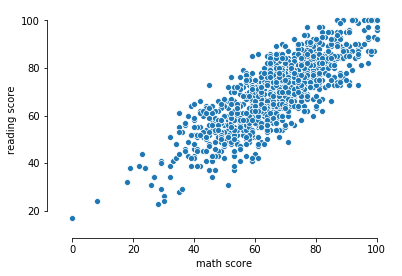

In [21]:
sns.scatterplot(x="math score", 
                y="reading score",
                data=data);

sns.despine(offset=10, trim=True)

## Gráficos de dispersão com reta de regressão

O método `sns.regplot` também recebe como argumentos as variáveis que desejamos estudar a correlação, sendo muito semelhante ao método que gera um gráfico de dispersão. 

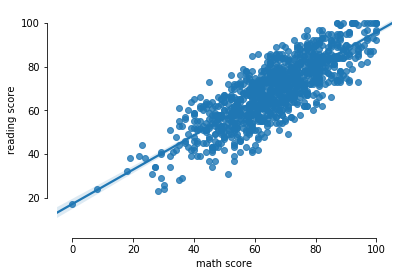

In [22]:
sns.regplot(x="math score", 
            y="reading score", 
            data=data);
sns.despine(offset=10, trim=True)

Agora vejamos como é simples criar em uma punica imagem um gráfico de regressão que separa em nossa amostra em dois grupos, neste caso o gênero.

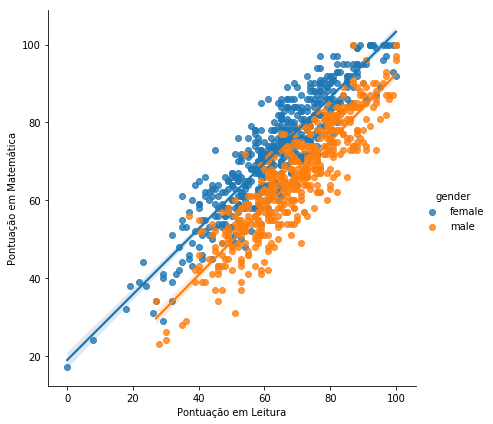

In [23]:
g = sns.lmplot(x="math score", y="reading score", hue="gender", # Bastou adicionar o argumento `hue` seguido da coluna com variáveis
               # categórias
               truncate=True, height=6, data=data)

g.set_axis_labels("Pontuação em Leitura", "Pontuação em Matemática")
plt.show()

## Criando painel

Utilizando o método `plt.subplots()` gera um "quadro" para que alocar os nossos gráficos. 
Os argumentos `nrows` e `ncols` determinam a número de linhas e colunas do nosso painel, respectivamente.
O argumento `figsize` recebe um `array` com a altura e largura dos quadros.

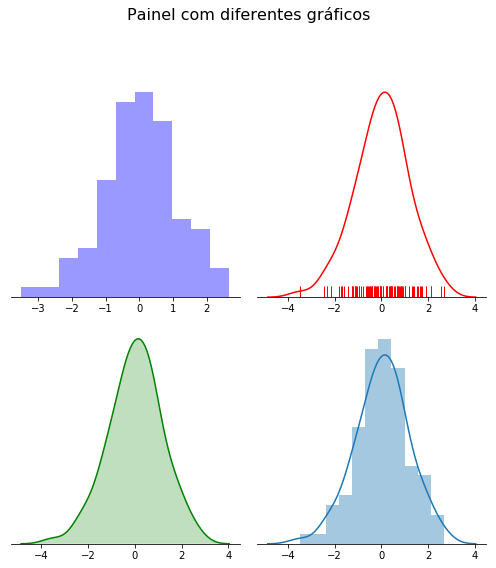

In [24]:
f, axes = plt.subplots(2, 2, figsize=(7, 7)) 
sns.despine(left=True)                               # Retira as bordas dos quadros.

np.random.seed(29)
amostra_normal = np.random.normal(size=100)          # Gerando uma amostra aleatória de tamanho 100 de uma população 
                                                     # normal padrão.

# A partir daqui podemos criar os gráficos normalmente alocando-os nos seus devidos "espaços"
sns.distplot(amostra_normal, 
             kde=False, 
             color="b", 
             ax=axes[0, 0])                          # Em `ax` devemos passar uma lista com a posição do quadro
                                                     # que queremos para este gráfico. Neste exemplo `[0, 0]` é o
                                                     # primeiro espaço para gráfico, ou seja, o gráfico ficará no lado superior
                                                     # esquerdo do quadro.

sns.distplot(amostra_normal, 
             hist=False, 
             rug=True, 
             color="r", 
             ax=axes[0, 1])

sns.distplot(amostra_normal, 
             hist=False, 
             color="g", 
             kde_kws={"shade": True}, 
             ax=axes[1, 0])

sns.distplot(amostra_normal,
             ax=axes[1, 1])

plt.setp(axes, 
         yticks=[])
plt.suptitle('Painel com diferentes gráficos', 
             y = 1.12,
             fontsize = 16)
plt.tight_layout()